In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"eshikagupta31","key":"129c30ac91c9c77a5eac71c33fa8952b"}'}

In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.28G/2.29G [00:13<00:00, 251MB/s]
100% 2.29G/2.29G [00:13<00:00, 178MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip -d chest_xray

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/chest_xray/train

In [ ]:
import os
os.listdir('chest_xray')

['chest_xray']

In [ ]:
os.listdir('chest_xray/chest_xray')

['test', '__MACOSX', 'chest_xray', 'val', 'train']

In [ ]:
os.listdir('chest_xray/chest_xray/train')

['NORMAL', 'PNEUMONIA']

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

train_dir = 'chest_xray/chest_xray/train'
test_dir  = 'chest_xray/chest_xray/test'
categories = ['NORMAL', 'PNEUMONIA']
img_size = (224, 224)

def load_data(directory):
    X, y = [], []
    for label, category in enumerate(categories):
        folder = os.path.join(directory, category)
        for file in os.listdir(folder):
            img_path = os.path.join(folder, file)
            img = load_img(img_path, target_size=img_size)
            img_array = img_to_array(img)
            X.append(img_array)
            y.append(label)
    return np.array(X)/255.0, np.array(y)

X_train, y_train = load_data(train_dir)
X_test, y_test   = load_data(test_dir)

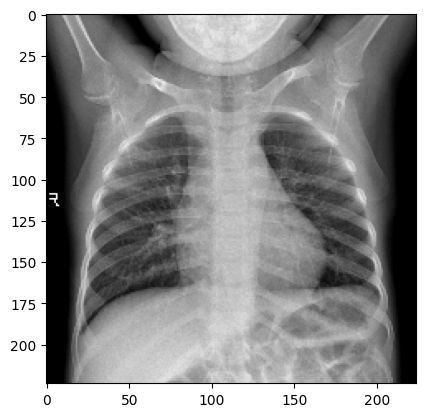

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[100])

In [ ]:
y_train[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test   = shuffle(X_test, y_test, random_state=42)

In [ ]:
y_train[:100]

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal", input_shape=(224,224,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
])
cnn= models.Sequential([
    data_augmentation,
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(74,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(50,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1,activation='sigmoid')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=3)

Epoch 1/3
163/163 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.6846 - loss: 0.8538
Epoch 2/3
163/163 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - accuracy: 0.7422 - loss: 0.4314
Epoch 3/3
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.7542 - loss: 0.4299


In [ ]:
y_pred=cnn.predict(X_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [ ]:
y_pred_classes=(y_pred > 0.5).astype("int32")
y_pred_classes[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [ ]:
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6141 - loss: 0.5744
Test accuracy: 0.625


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))
print("Classification Report:\n", classification_report(y_test, y_pred_classes, target_names=["NORMAL", "PNEUMONIA"]))

Accuracy: 0.625
Confusion Matrix:
 [[  0 234]
 [  0 390]]
Classification Report:
               precision    recall  f1-score   support

      NORMAL       0.00      0.00      0.00       234
   PNEUMONIA       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#applying transfer learning
from tensorflow.keras.applications import ResNet50
model=ResNet50(include_top=False,weights='imagenet', input_shape=(224,224,3))
#freezing model layers
model.trainable=False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
transfer = models.Sequential([
    data_augmentation,
    model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import Adam
transfer.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#applying early stopping
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss',factor=0.2, patience=5, min_lr=1e-5, verbose=1)

In [ ]:
transfer.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stop, lr_scheduler])

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 38s 180ms/step - accuracy: 0.7073 - loss: 0.6344 - val_accuracy: 0.6250 - val_loss: 0.6706 - learning_rate: 1.0000e-04
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 34s 147ms/step - accuracy: 0.7413 - loss: 0.5849 - val_accuracy: 0.6250 - val_loss: 0.6488 - learning_rate: 1.0000e-04
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 150ms/step - accuracy: 0.7469 - loss: 0.5589 - val_accuracy: 0.6250 - val_loss: 0.6531 - learning_rate: 1.0000e-04
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 25s 152ms/step - accuracy: 0.7474 - loss: 0.5417 - val_accuracy: 0.6250 - val_loss: 0.6204 - learning_rate: 1.0000e-04
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 40s 148ms/step - accuracy: 0.7376 - loss: 0.5271 - val_accuracy: 0.6298 - val_loss: 0.5935 - learning_rate: 1.0000e-04
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 25s 152ms/step - accuracy: 0.7540 - loss: 0.4936 - val_accuracy: 0.6875 - val_loss: 0.5568 - learning_rate: 1.0000e-04
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
transfer.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,260,421 (96.36 MB)

 Trainable params: 557,569 (2.13 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 1,115,140 (4.25 MB)

In [ ]:
loss, acc = transfer.evaluate(X_test, y_test, verbose=1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.7830 - loss: 0.4835


In [ ]:
acc

0.7820512652397156

In [ ]:
#fine tuning last 30 layers to get a higher accuracy
model.trainable=True
for layer in model.layers[:-30]:
    layer.trainable = False

In [ ]:
transfer.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss',factor=0.2, patience=5, min_lr=1e-5, verbose=1)

In [ ]:
transfer.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32, callbacks=[early_stop, lr_scheduler])

Epoch 1/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 53s 232ms/step - accuracy: 0.7257 - loss: 0.7904 - val_accuracy: 0.3750 - val_loss: 2.5569 - learning_rate: 1.0000e-05
Epoch 2/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 31s 192ms/step - accuracy: 0.9231 - loss: 0.1905 - val_accuracy: 0.8670 - val_loss: 0.3253 - learning_rate: 1.0000e-05
Epoch 3/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 195ms/step - accuracy: 0.9294 - loss: 0.1937 - val_accuracy: 0.8397 - val_loss: 0.3622 - learning_rate: 1.0000e-05
Epoch 4/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 195ms/step - accuracy: 0.9362 - loss: 0.1647 - val_accuracy: 0.8061 - val_loss: 0.4191 - learning_rate: 1.0000e-05
Epoch 5/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 32s 194ms/step - accuracy: 0.9407 - loss: 0.1601 - val_accuracy: 0.8734 - val_loss: 0.3063 - learning_rate: 1.0000e-05
Epoch 6/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 194ms/step - accuracy: 0.9446 - loss: 0.1462 - val_accuracy: 0.8301 - val_loss: 0.4714 - learning_rate: 1.0000e-05
Epoch 7/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 32s 19

In [ ]:
loss, acc = transfer.evaluate(X_test, y_test)
print(acc)

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.8661 - loss: 0.2889
0.8733974099159241
